In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from libs.volatility import get_volatility, populate_df_volatility

In [2]:
ticker = yf.ticker.Ticker("TQQQ")

In [3]:
ticker.options

('2025-04-17',
 '2025-04-25',
 '2025-05-02',
 '2025-05-09',
 '2025-05-16',
 '2025-05-23',
 '2025-05-30',
 '2025-06-20',
 '2025-09-19',
 '2026-01-16',
 '2027-01-15')

In [4]:
tqqq_option = ticker.option_chain('2025-04-17')
tqqq_option.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,TQQQ250417C00020000,2025-04-11 16:39:46+00:00,20.0,28.07,0.0,0.0,0.0,0.0,NaN,11,0.000010,True,REGULAR,USD
1,TQQQ250417C00021000,2025-04-09 17:42:19+00:00,21.0,26.40,0.0,0.0,0.0,0.0,NaN,1,0.000010,True,REGULAR,USD
2,TQQQ250417C00023000,2025-04-15 19:52:27+00:00,23.0,26.83,0.0,0.0,0.0,0.0,1.0,7,0.000010,True,REGULAR,USD
3,TQQQ250417C00023500,2025-04-15 19:52:27+00:00,23.5,26.30,0.0,0.0,0.0,0.0,1.0,2,0.000010,True,REGULAR,USD
4,TQQQ250417C00025000,2025-04-14 13:52:04+00:00,25.0,25.76,0.0,0.0,0.0,0.0,1.0,60,0.000010,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,TQQQ250417C00100000,2025-04-14 13:46:34+00:00,100.0,0.01,0.0,0.0,0.0,0.0,1.0,2971,0.500005,False,REGULAR,USD
98,TQQQ250417C00101000,2025-04-11 13:37:33+00:00,101.0,0.01,0.0,0.0,0.0,0.0,72.0,180,0.500005,False,REGULAR,USD
99,TQQQ250417C00102000,2025-04-14 15:16:09+00:00,102.0,0.63,0.0,0.0,0.0,0.0,1.0,29,0.500005,False,REGULAR,USD
100,TQQQ250417C00105000,2025-04-14 15:16:09+00:00,105.0,0.43,0.0,0.0,0.0,0.0,1.0,165,0.500005,False,REGULAR,USD


In [5]:
df = ticker.history(start="2025-03-10", end="2025-04-10")
df['Returns'] = np.log( df['Close'] / df['Close'].shift() ).dropna()
np.std( df['Returns'] ) * np.sqrt(252) 

1.4940042121269006

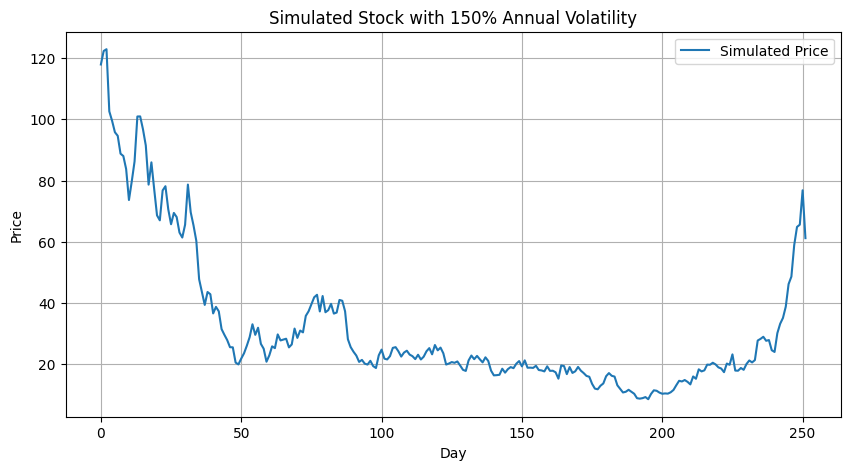

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
S0 = 100             # Initial stock price
mu = 0               # Drift (set to 0 to focus on volatility)
sigma = 1.5          # 150% annualized volatility
T = 1                # 1 year
steps = 252          # Trading days in a year
dt = T / steps       # Time increment

# Simulate returns
np.random.seed(3)   # For reproducibility
Z = np.random.normal(0, 1, steps)
returns = (mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z

# Generate price path
prices = S0 * np.exp(np.cumsum(returns))

# Plot
plt.figure(figsize=(10, 5))
plt.plot(prices, label="Simulated Price")
plt.title("Simulated Stock with 150% Annual Volatility")
plt.xlabel("Day")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


In [7]:
today = pd.Timestamp.today().normalize()

# Generate the last 5 business days
business_dates = pd.date_range(end=today, periods=30, freq='B')

DATE_FORMAT = "%Y-%m-%d"

start = business_dates[0].strftime( DATE_FORMAT )
end = business_dates[-1].strftime( DATE_FORMAT )

In [8]:
df_tqqq = ticker.history(start=start, end=end)
df_tqqq

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2025-03-06 00:00:00-05:00,68.188819,70.292613,64.978290,65.845734,122822700,0.000,0.0,0.0
2025-03-07 00:00:00-05:00,65.367144,67.809942,62.705000,67.211708,135177300,0.000,0.0,0.0
2025-03-10 00:00:00-04:00,63.811737,64.001181,57.709741,59.634064,156135800,0.000,0.0,0.0
2025-03-11 00:00:00-04:00,59.225271,61.668061,57.201240,58.936123,139489300,0.000,0.0,0.0
2025-03-12 00:00:00-04:00,61.757795,62.475678,58.985974,60.950180,141918600,0.000,0.0,0.0
2025-03-13 00:00:00-04:00,60.621151,60.671003,56.872213,57.620007,121227300,0.000,0.0,0.0
2025-03-14 00:00:00-04:00,59.534355,62.046943,59.324974,61.707943,99108500,0.000,0.0,0.0
2025-03-17 00:00:00-04:00,61.697975,64.090913,60.970123,62.904415,90150400,0.000,0.0,0.0
2025-03-18 00:00:00-04:00,61.588298,61.598267,58.836414,59.733768,87826200,0.000,0.0,0.0


In [9]:
get_volatility("TQQQ", periods=30)

1.4893250194976564

In [10]:
df_tqqq = populate_df_volatility( df_tqqq, symbol="TQQQ" )
df_tqqq

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,Volatility
0,2025-03-06 00:00:00-05:00,68.188819,70.292613,64.978290,65.845734,122822700,0.000,0.0,0.0,0.591623
1,2025-03-07 00:00:00-05:00,65.367144,67.809942,62.705000,67.211708,135177300,0.000,0.0,0.0,0.623400
2,2025-03-10 00:00:00-04:00,63.811737,64.001181,57.709741,59.634064,156135800,0.000,0.0,0.0,0.618549
3,2025-03-11 00:00:00-04:00,59.225271,61.668061,57.201240,58.936123,139489300,0.000,0.0,0.0,0.650055
4,2025-03-12 00:00:00-04:00,61.757795,62.475678,58.985974,60.950180,141918600,0.000,0.0,0.0,0.630244
5,2025-03-13 00:00:00-04:00,60.621151,60.671003,56.872213,57.620007,121227300,0.000,0.0,0.0,0.643447
6,2025-03-14 00:00:00-04:00,59.534355,62.046943,59.324974,61.707943,99108500,0.000,0.0,0.0,0.652997
7,2025-03-17 00:00:00-04:00,61.697975,64.090913,60.970123,62.904415,90150400,0.000,0.0,0.0,0.695370
8,2025-03-18 00:00:00-04:00,61.588298,61.598267,58.836414,59.733768,87826200,0.000,0.0,0.0,0.698533
9,2025-03-19 00:00:00-04:00,60.501503,63.722001,59.763678,62.056915,92593200,0.000,0.0,0.0,0.696471


<Axes: >

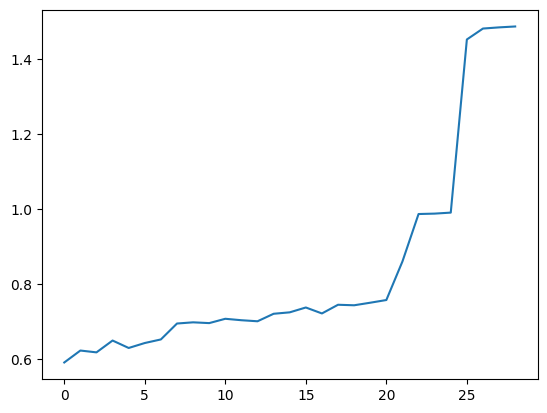

In [11]:
df_tqqq['Volatility'].plot()